In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from pycytominer.cyto_utils import infer_cp_features
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
mad = pd.read_csv("2016_04_01_a549_48hr_batch1_consensus_median_feature_select_dmso.csv.gz", low_memory=False)
sph = pd.read_csv("/Users/mbornhol/git/neural-profiling/baseline/01_data/level_3_data/sub_level3.csv", low_memory=False)

In [4]:
sph.dropna(axis=1, inplace=True)

mad_featusph = infer_cp_features(mad)
sph_featusph = infer_cp_features(sph)
mad = mad.sample(frac = 1)
sph = sph.sample(frac = 1)

In [5]:
# sph = sph.dropna()


In [6]:
pca = PCA(n_components=2)
pca_mad = pca.fit_transform(mad[mad_featusph].values)
mad['pca_one'] = pca_mad[:,0]
mad['pca_two'] = pca_mad[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
pca_sph = pca.fit_transform(sph[sph_featusph].values)
sph['pca_one'] = pca_sph[:,0]
sph['pca_two'] = pca_sph[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.98884649 0.00961909]
Explained variation per principal component: [0.9715697  0.01149624]


In [7]:
def is_dmso(sample):
    if sample == 'DMSO':
        return "DMSO"
    else:
        return "Perturbed"
mad['DMSO'] = mad.Metadata_broad_sample.apply(is_dmso)
sph['DMSO'] = sph.Metadata_broad_sample.apply(is_dmso)


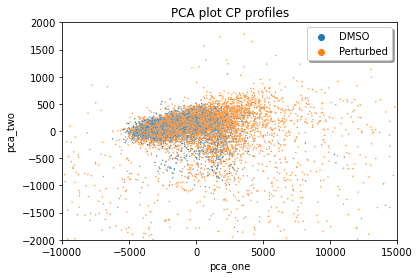

In [31]:
fig, ax =plt.subplots()
plt.style.use({'figure.facecolor':'white'})
plt.title("PCA plot CP profiles")
gfg = sns.scatterplot(data=sph, x="pca_one", y='pca_two', hue = sph['DMSO'], hue_order = ["DMSO", "Perturbed"], s = 2, palette="tab10")
plt.legend(loc = 'upper right', shadow=True)
plt.xlim(-10000, 15000)
plt.ylim(-2000, 2000)
plt.show()
# palette="tab10"

In [27]:
[sns.color_palette("tab10", 10)[9], sns.color_palette("tab10", 10)[3]]


# maybe thats the batch 5?

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)]

In [11]:
# Get Batch data
batch = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/01_data/level_3_data/sub_level3.csv')
b = batch[['Metadata_Batch_Number', 'Metadata_Plate', 'Metadata_Well']]

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8,9,16,17,18,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#mad = pd.merge(mad, b, how="left", on=['Metadata_Plate', 'Metadata_Well'])
sph = pd.merge(sph, b, how="left", on=['Metadata_Plate', 'Metadata_Well'])

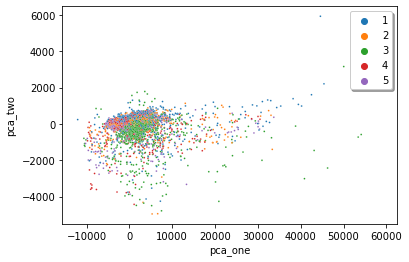

In [56]:
fig, ax =plt.subplots()
plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=sph, x="pca_one", y='pca_two', hue = sph['Metadata_Batch_Number_y'], s = 3, ax=ax, palette="tab10")
plt.legend(loc = 'upper right', shadow=True)
#gfg = sns.scatterplot(data=mad, x="pca_one", y='pca_two', hue=mad["Metadata_Batch_Number"], s = 3,ax=ax[1], palette="tab10")

[]

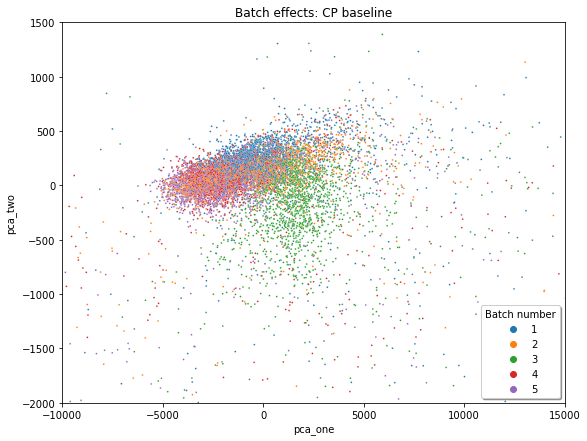

In [15]:
fig, ax = plt.subplots(figsize=(9,7))


plt.title("Batch effects: CP baseline")

plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=sph, x="pca_one", y='pca_two', hue = sph['Metadata_Batch_Number_y'], s = 3, ax=ax, palette="tab10")

plt.xlim(-10000, 15000)
plt.ylim(-2000, 1500)
plt.legend(loc = 'lower right', shadow=True, title='Batch number')
plt.plot()

In [1]:
# DMSO plots

fig, ax =plt.subplots()
plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=sph, x="pca_one", y='pca_two', hue = sph['DMSO'], s = 3, ax=ax, palette="tab10")
plt.legend(loc = 'upper right', shadow=True)
plt.xlim(-10000, 15000)
plt.ylim(-2000, 2000)


NameError: name 'plt' is not defined

In [62]:
mad_rob = normalize(
    profiles=mad,
    featusph=mad_featusph,
    samples="Metadata_broad_sample == 'DMSO'",
    method='robustize',
    output_file='none'
)

Explained variation per principal component: [0.50562739 0.10818844]


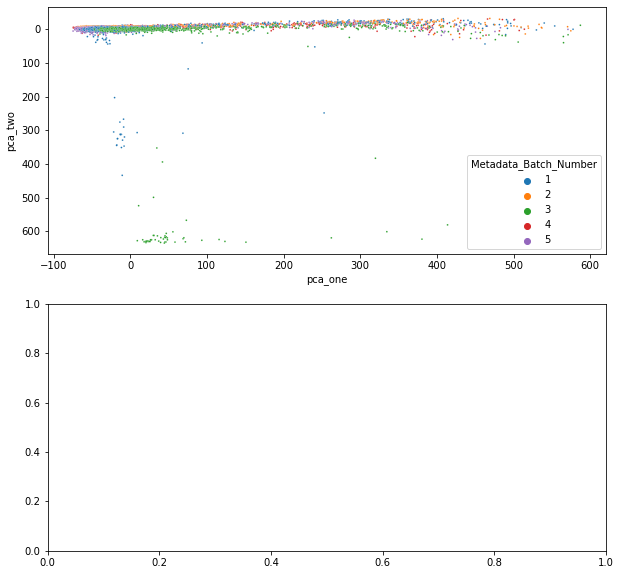

In [66]:
pca = PCA(n_components=2)
pca_sphult = pca.fit_transform(mad_rob[mad_featusph].values)
mad_rob['pca_one'] = pca_sphult[:,0]
mad_rob['pca_two'] = pca_sphult[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
fig, ax =plt.subplots(2,1, figsize=(10,10))
plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=mad_rob, x="pca_one", y='pca_two', hue = sph['Metadata_Batch_Number'], s = 3, ax=ax[0], palette="tab10")
#gfg = sns.scatterplot(data=mad, x="pca_one", y='pca_two', hue=mad["Metadata_Batch_Number"], s = 3,ax=ax[1], palette="tab10")
ax[0].invert_yaxis()

In [77]:
mad[mad_featusph].max()

efficientnet_0      -0.073208
efficientnet_1      -0.040627
efficientnet_2       0.154183
efficientnet_3       0.350313
efficientnet_4      -0.064337
                       ...   
efficientnet_6395    1.218769
efficientnet_6396   -0.020575
efficientnet_6397   -0.083425
efficientnet_6398   -0.013553
efficientnet_6399    1.250152
Length: 6400, dtype: float64

In [78]:
mad[mad_featusph].min()


efficientnet_0      -0.185217
efficientnet_1      -0.167878
efficientnet_2      -0.183354
efficientnet_3      -0.167400
efficientnet_4      -0.130842
                       ...   
efficientnet_6395   -0.212059
efficientnet_6396   -0.070705
efficientnet_6397   -0.190185
efficientnet_6398   -0.127590
efficientnet_6399   -0.102496
Length: 6400, dtype: float64

In [80]:
sph[sph_featusph].max()

resnet_0        0.449973
resnet_1        0.028190
resnet_2        3.672522
resnet_3        0.000000
resnet_4        0.168858
                  ...   
resnet_10235    0.097862
resnet_10236    1.119934
resnet_10237    0.529383
resnet_10238    1.103493
resnet_10239    0.000000
Length: 10240, dtype: float64

In [81]:
10240/5

2048.0

In [17]:
mad


,Metadata_Plate_Map_Name,Metadata_cell_id,Metadata_broad_sample,Metadata_pert_well,Metadata_mmoles_per_liter,Metadata_dose_recode,Metadata_time_point,Metadata_moa,Metadata_target,Cells_AreaShape_Area,...,Nuclei_Texture_SumAverage_Mito_5_0,Nuclei_Texture_SumAverage_RNA_20_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_Variance_RNA_10_0,pca_one,pca_two,DMSO
9873,C-7161-01-LM6-026,A549,BRD-K91601245-001-12-0,K04,0.370370,3,48H,immunosuppressant|protein synthesis inhibitor|...,HPRT1|IMPDH1|IMPDH2|PPAT,0.082842,...,0.584110,0.549350,-1.131300,-0.827530,-1.503600,0.60113,0.377550,-1.524721e+16,-7.977880e+14,0.9
6853,C-7161-01-LM6-018,A549,BRD-K66615216-003-14-8,N14,3.333300,5,48H,bacterial DNA gyrase inhibitor,TOP2A,-0.571750,...,1.375900,0.859650,1.202100,1.359700,1.028200,0.88867,-1.497600,-1.524721e+16,-7.977880e+14,0.9
4578,C-7161-01-LM6-012,A549,BRD-K60230970-001-10-0,O01,19.999000,7,48H,proteasome inhibitor,PSMB1,0.886025,...,1.945000,3.316250,-1.400400,1.175500,-11.937500,5.51250,5.362050,2.505592e+17,-5.579640e+15,0.9
1996,C-7161-01-LM6-006,A549,BRD-A24514565-001-09-7,P17,0.123460,2,48H,vitamin K antagonist,VKORC1,1.192300,...,0.178230,-0.919660,1.497300,1.191000,1.697700,-1.08720,-0.781670,8.978931e+15,-1.232888e+15,0.9
10339,C-7161-01-LM6-027,A549,BRD-K99604664-001-01-1,N20,3.333300,5,48H,progesterone receptor agonist,PGR,2.535100,...,2.023900,-0.752470,0.021506,0.157730,-0.377470,-1.45610,-1.150400,-1.524614e+16,-7.378503e+14,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,C-7161-01-LM6-005,A549,BRD-K09549677-300-03-4,I10,0.370370,3,48H,T-type calcium channel blocker,ANO1|CACNA1C|CACNA1D|CACNA1F|CACNA1G|CACNA1H|C...,0.342000,...,-0.420870,0.004467,-0.010923,0.112420,-0.075616,0.11242,0.468210,-1.524721e+16,-7.977880e+14,0.9
5129,C-7161-01-LM6-014,A549,BRD-K40870905-001-01-7,P12,0.041152,1,48H,integrin antagonist,ITGA4,0.387470,...,1.327000,-0.220710,1.068900,0.983450,0.099444,0.08655,-0.410360,-1.524721e+16,-7.977880e+14,0.9
8017,C-7161-01-LM6-021,A549,BRD-K86797399-001-04-4,O14,3.333300,5,48H,HDAC inhibitor,HDAC1|HDAC10|HDAC2|HDAC3|HDAC4|HDAC5|HDAC6|HDAC9,0.545810,...,5.185000,5.429900,7.219700,8.339700,4.099700,-0.99211,-16.535000,-1.497949e+16,6.312294e+15,0.9
10352,C-7161-01-LM6-027,A549,DMSO,B03,0.000000,1,48H,unknown,unknown,0.594260,...,0.092706,-0.731710,0.263930,0.412600,0.384240,0.13567,0.038542,-1.524721e+16,-7.977880e+14,0.1


In [21]:
# Center of the feature space
sph[sph_featusph].median().median()

0.92753

In [22]:
sph[sph_featusph].mean().mean()


64.0341969907484

(array([1.742e+03, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-3.55624090e+00,  1.16188413e+03,  2.32732450e+03,  3.49276487e+03,
         4.65820524e+03,  5.82364560e+03,  6.98908597e+03,  8.15452634e+03,
         9.31996671e+03,  1.04854071e+04,  1.16508475e+04]),
 <BarContainer object of 10 artists>)

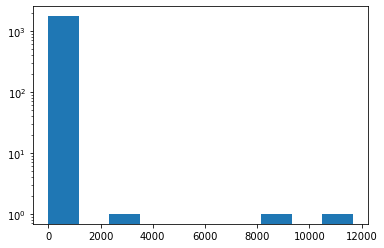

In [27]:
plt.hist(sph[sph_featusph].mean().tolist(), log=True)

In [29]:
stand = normalize(
    profiles=sph,
    features=sph_featusph,
    samples="Metadata_broad_sample == 'DMSO'",
    method='standardize',
    output_file='none'
)


In [32]:
stand[sph_featusph].mean()

Cells_AreaShape_Area                 0.698055
Cells_AreaShape_Center_X             0.039651
Cells_AreaShape_Center_Y            -0.043270
Cells_AreaShape_Compactness          0.117790
Cells_AreaShape_Eccentricity         0.092747
                                       ...   
Nuclei_Texture_Variance_Mito_20_0    0.187605
Nuclei_Texture_Variance_Mito_5_0     0.125444
Nuclei_Texture_Variance_RNA_10_0    -0.213558
Nuclei_Texture_Variance_RNA_20_0    -0.098946
Nuclei_Texture_Variance_RNA_5_0     -0.283108
Length: 1745, dtype: float64

In [33]:
pca = PCA(n_components=2)
pca_mad = pca.fit_transform(stand[sph_featusph].values)
stand['pca_one'] = pca_mad[:,0]
stand['pca_two'] = pca_mad[:,1]

Explained variation per principal component: [0.97407081 0.00671385]


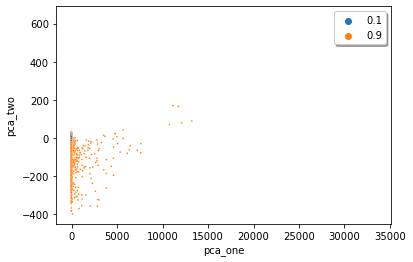

In [34]:
def is_dmso(sample):
    if sample == 'DMSO':
        return 0.1
    else:
        return 0.9
stand['DMSO'] = stand.Metadata_broad_sample.apply(is_dmso)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
fig, ax =plt.subplots()
plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=stand, x="pca_one", y='pca_two', hue = stand['DMSO'], s = 3, ax=ax, palette="tab10")
plt.legend(loc = 'upper right', shadow=True)

